In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'G:\\git\\fastcamp_dl\\1. [Tensorflow 2.0 과 Pytorch]\\3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch'

In [3]:
os.listdir('./dataset/mnist_png/')

['testing', 'training']

In [4]:
data_paths = glob('./dataset/mnist_png/training/*/*.png')

In [5]:
data_paths[0]

'./dataset/mnist_png/training\\0\\1.png'

In [6]:
len(data_paths)

60000

In [7]:
path = data_paths[0]

In [8]:
path

'./dataset/mnist_png/training\\0\\1.png'

# 데이터 분석 (MNIST)

In [9]:
os.listdir('./dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
label_nums = os.listdir('./dataset/mnist_png/training/')

Label 0의 데이터 갯수 확인

In [11]:
len(label_nums)

10

### 데이터 별 갯수 비교

In [12]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('./dataset/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [13]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [14]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

Text(0.5, 1.0, 'Number of Dataset per class')

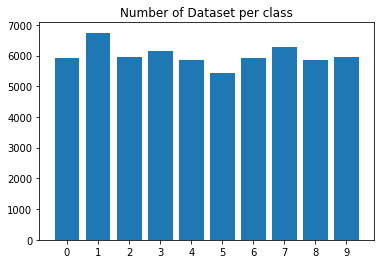

In [15]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')

# Pillow로 열기

In [16]:
path

'./dataset/mnist_png/training\\0\\1.png'

In [17]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [18]:
image.shape

(28, 28)

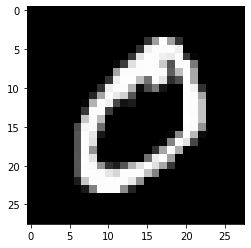

In [19]:
plt.imshow(image, 'gray')

# TensorFlow로 열기

In [20]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [21]:
image.shape

TensorShape([28, 28, 1])

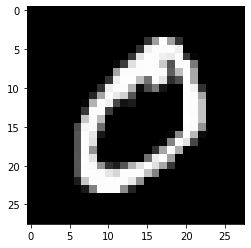

In [22]:
plt.imshow(image[:, :, 0], 'gray')

# Label 얻기

In [23]:
path

'./dataset/mnist_png/training\\0\\1.png'

In [24]:
path.split("\\")

['./dataset/mnist_png/training', '0', '1.png']

In [26]:
label = path.split("\\")[-2]

In [27]:
int(label)

0

In [28]:
def get_label(path):
    class_name = path.split("\\")[-2]
    label = int(class_name)
    return label

In [29]:
path, get_label(path)

('./dataset/mnist_png/training\\0\\1.png', 0)

# 데이터 이미지 사이즈 알기

In [33]:
from tqdm.notebook import tqdm

In [34]:
heights = []
widths = []

In [36]:
for path in tqdm(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

In [37]:
np.unique(heights)

array([28])

In [38]:
np.unique(widths)

array([28])

Text(0.5, 1.0, 'Weights')

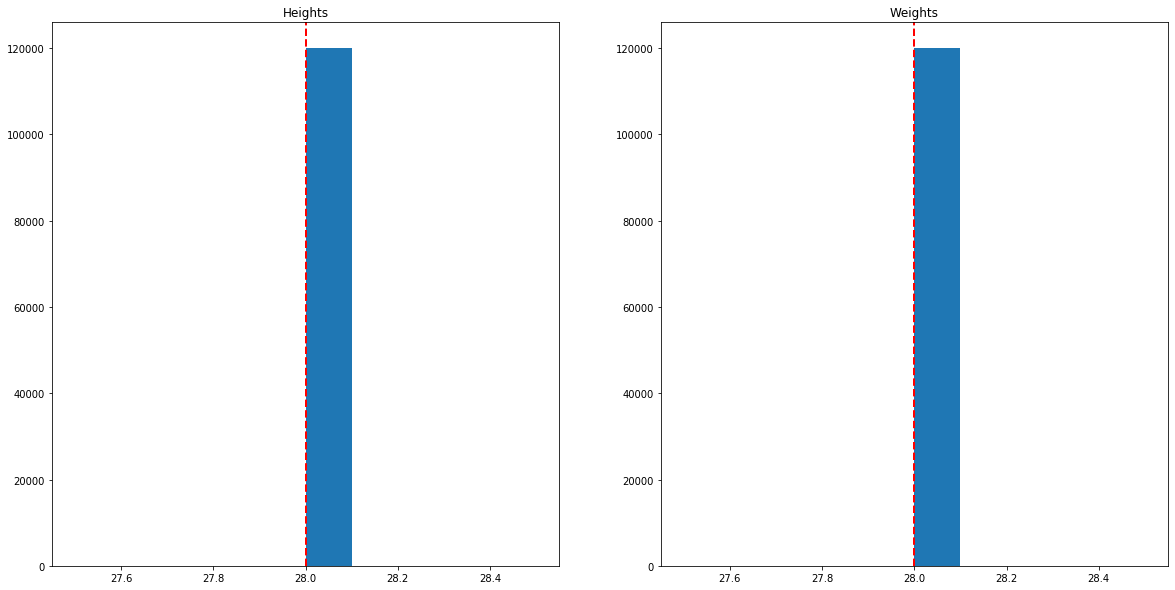

In [40]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title("Heights")
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)
plt.title("Weights")